In [6]:
#Importar librerías necesarias

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import scipy.optimize as spopt
import scipy.fftpack as spfft
import scipy.ndimage as spimg

In [15]:
#Carga y filtro de los datos por tipo de magnitud

data = pd.read_csv('sismologia_db.csv')
#=data[data['PROFUNDIDAD']>50] #profundos
data=data[data['PROFUNDIDAD']<=50] #someros
data

,ANO,MES,DIA,LATITUD,LONGITUD,PROFUNDIDAD,COLOR,Ml,SIZE,Mw,DEPARTAMENTO,MUNICIPIO,X,Y
38649,2001,1,14,6.434,-73.939,49.7,2,3.4,10,NaN,SANTANDER,CIMITARRA,1.015706e+06,1202922.529
38650,2008,11,22,6.762,-74.121,49.0,2,2.1,2,NaN,SANTANDER,PUERTO_PARRA,9.955748e+05,1239193.819
38651,2002,4,6,6.584,-73.641,48.2,2,2.0,2,NaN,SANTANDER,EL_CARMEN,1.048658e+06,1219529.898
38652,2002,5,2,6.509,-73.555,47.0,2,2.1,2,NaN,SANTANDER,EL_CARMEN,1.058178e+06,1211244.558
38653,2000,2,25,6.464,-74.136,45.7,2,1.9,2,NaN,SANTANDER,PUERTO_PARRA,9.939127e+05,1206238.427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39509,2009,6,14,6.705,-73.699,0.0,2,1.2,2,NaN,SANTANDER,EL_CARMEN,1.042234e+06,1232906.224
39510,2010,10,21,5.785,-74.101,0.0,2,1.2,2,NaN,SANTANDER,FLORIAN,9.977813e+05,1131149.532
39511,2009,6,18,6.817,-73.678,0.0,2,1.1,2,NaN,SANTANDER,EL_CARMEN,1.044545e+06,1245294.404
39512,2010,8,17,7.127,-73.538,0.0,2,1.1,2,NaN,SANTANDER,SAN_VICENTE_DE_CHUCURI,1.059982e+06,1279594.051


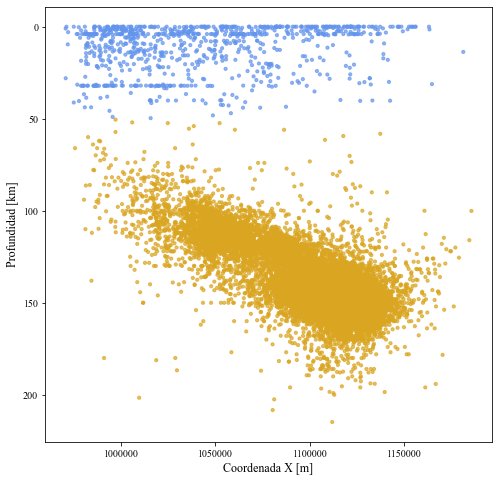

In [8]:
categories=data['COLOR'].to_numpy()
colormap = np.array(['g','goldenrod','cornflowerblue'])

plt.rcParams.update({'font.family':'Times New Roman'})
plt.figure(figsize=(8, 8))
plt.scatter(data['X'], data['PROFUNDIDAD'], s=10, c=colormap[categories], alpha=0.7)
plt.gca().invert_yaxis()
plt.xlabel('Coordenada X [m]', fontsize=12)
plt.ylabel('Profundidad [km]', fontsize=12)
plt.savefig('grafica.png', dpi=400) 
plt.show()
 

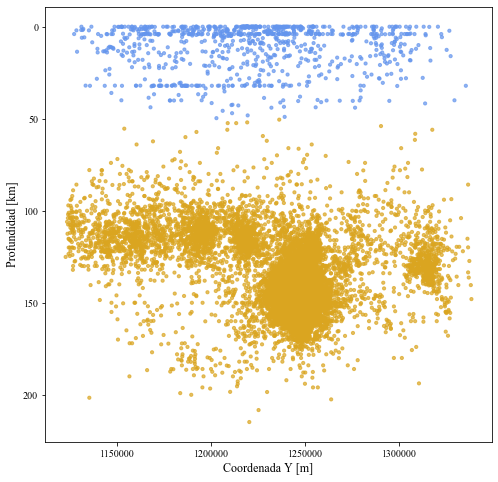

In [9]:
plt.figure(figsize=(8, 8))
plt.scatter(data['Y'], data['PROFUNDIDAD'], s=10, c=colormap[categories], alpha=0.7)
plt.gca().invert_yaxis()
plt.xlabel('Coordenada Y [m]', fontsize=12)
plt.ylabel('Profundidad [km]', fontsize=12)
plt.savefig('grafica2.png', dpi=400) 
plt.show()

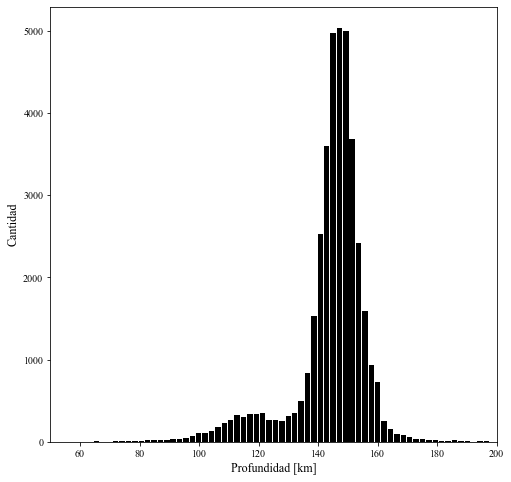

In [10]:
plt.figure(figsize=(8, 8))
plt.hist(x=data['PROFUNDIDAD'], color='black', bins=100, rwidth=0.85)
plt.xlabel('Profundidad [km]', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.xlim([50, 200])
plt.savefig('histograma1.png', dpi=400) 
plt.show() #dibujamos el histograma

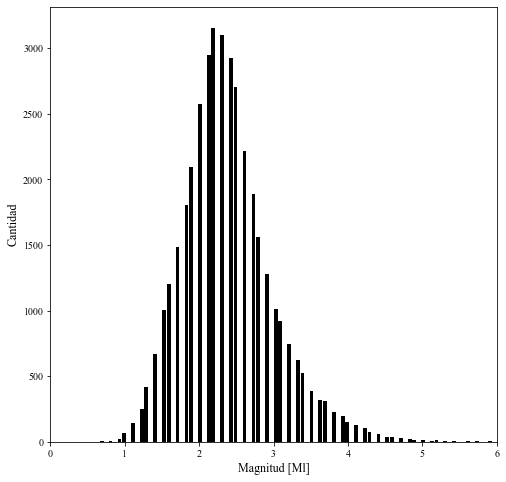

In [11]:
plt.figure(figsize=(8, 8))
plt.hist(x=data['Ml'], color='black', bins=100, rwidth=0.85)
plt.xlabel('Magnitud [Ml]', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.xlim([0, 6])
plt.savefig('histograma2.png', dpi=400) 
plt.show() #dibujamos el histograma

In [16]:
data.describe()

,ANO,MES,DIA,LATITUD,LONGITUD,PROFUNDIDAD,COLOR,Ml,SIZE,Mw,X,Y
count,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.0,865.000000,865.000000,0.0,8.650000e+02,8.650000e+02
mean,2005.164162,6.417341,16.287861,6.608761,-73.672543,11.342659,2.0,2.137225,2.774566,NaN,1.045158e+06,1.222287e+06
std,3.594731,3.604964,8.680099,0.408202,0.427904,12.229506,0.0,0.627718,2.631065,NaN,4.731060e+04,4.515580e+04
min,2000.000000,1.000000,1.000000,5.750000,-74.346000,0.000000,2.0,0.700000,2.000000,NaN,9.707043e+05,1.127282e+06
25%,2002.000000,3.000000,9.000000,6.296000,-74.036000,1.700000,2.0,1.700000,2.000000,NaN,1.004967e+06,1.187663e+06
50%,2005.000000,6.000000,17.000000,6.604000,-73.741000,5.100000,2.0,2.100000,2.000000,NaN,1.037606e+06,1.221764e+06
75%,2009.000000,10.000000,24.000000,6.878000,-73.366000,18.400000,2.0,2.400000,2.000000,NaN,1.079000e+06,1.252068e+06
max,2010.000000,12.000000,31.000000,7.632000,-72.442000,49.700000,2.0,5.400000,40.000000,NaN,1.181174e+06,1.335509e+06


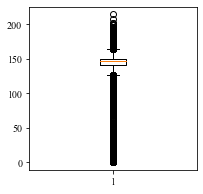

In [702]:
plt.figure(figsize=(3, 3))
plt.boxplot(data['PROFUNDIDAD'])
plt.savefig('bigotes1.png', dpi=400) 

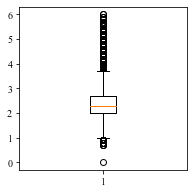

In [703]:
plt.figure(figsize=(3, 3))
plt.boxplot(data['Ml'])
plt.savefig('bigotes2.png', dpi=400) 

# Ley GR

In [704]:
#Cálculo de las frecuencias por magnitud

counts = data['Ml'].value_counts().to_dict()

In [705]:
#Frecuencia acumulada por magnitud

frecuencia = pd.Series(counts, name='Frec')
frecuencia.index.name = 'Magnitud'

frecuencia.to_csv('Frecuencia_acumulada.csv')
data_frecuencia = pd.read_csv('Frecuencia_acumulada.csv')

In [706]:
# Ordenar la información de mayor a menor magnitud

by_magn = data_frecuencia.sort_values('Magnitud', ascending=False)
data_final=pd.DataFrame(by_magn)
cumulative = np.cumsum(data_final['Frec'])
concat = pd.concat([data_final,cumulative], axis=1)
data2=pd.DataFrame(concat)
data2.columns = ['Magnitud', 'Frecuencia', 'Frecuencia_acum']

In [707]:
#Definición de la completitud y función de regresión

Completitud1=2.3
valo_1= data2['Magnitud'] > Completitud1
y=data2['Frecuencia_acum'][valo_1]
x=data2['Magnitud'][valo_1]

def pred1 (x0, x):
    return 10**(x0[0] + (x0[1]*x))

In [708]:
#Regresión lineal por la norma L1

from scipy import stats
slope, intercept, r_value, p_value, std_err=stats.linregress(x, np.log10(y))
r2_value=r_value*r_value
lreg=np.vstack((intercept, slope, r2_value))
lreg

array([[ 6.91376998],
       [-1.03489981],
       [ 0.99251238]])

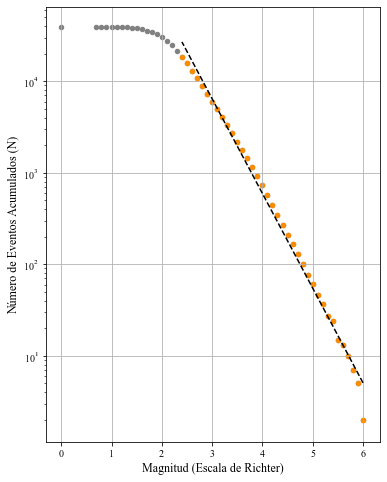

In [709]:
#Gráfica de la Ley Gutenberg-Richter

data2.plot.scatter(x="Magnitud", y="Frecuencia_acum", c="grey", figsize=(6,8))
plt.xlabel('Magnitud (Escala de Richter)', fontsize=12)
plt.ylabel('Número de Eventos Acumulados (N)', fontsize=12)
plt.yscale("log")
plt.scatter(x, y, s=20, c="darkorange")
plt.plot(x, pred1(lreg, x), 'k--')
plt.grid()

plt.savefig('LeyGR.png', dpi=400)

# Distribución de Sismos

In [710]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as spopt
import scipy.fftpack as spfft
import scipy.ndimage as spimg
from mpl_toolkits import mplot3d

In [711]:
df_punto2 = data[['Ml','X','Y','PROFUNDIDAD']]

In [712]:
df_punto2['MAGNITUD'] = df_punto2['Ml'].astype('float')
df_punto2['coordenadaX'] = df_punto2['X'].astype('float')
df_punto2['coordenadaY'] = df_punto2['Y'].astype('float')
df_punto2['DEPTH'] = df_punto2['PROFUNDIDAD'].astype('float')
print(df_punto2.dtypes)

Ml             float64
X              float64
Y              float64
PROFUNDIDAD    float64
MAGNITUD       float64
coordenadaX    float64
coordenadaY    float64
DEPTH          float64
dtype: object


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

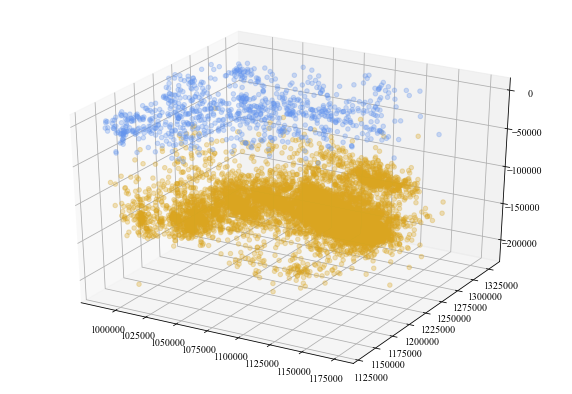

In [713]:
#Scatter plot 3D

z=data['PROFUNDIDAD']
y=data['Y']
x=data['X']

data1=df_punto2[df_punto2['PROFUNDIDAD']>50]

z1=data1['PROFUNDIDAD']
y1=data1['Y']
x1=data1['X']

data2=df_punto2[df_punto2['PROFUNDIDAD']<50]

z2=data2['PROFUNDIDAD']
y2=data2['Y']
x2=data2['X']

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(x1, y1, -1000*z1, color = "goldenrod", alpha=0.3)
ax.scatter3D(x2, y2, -1000*z2, color = "cornflowerblue", alpha=0.3)
ax.set_xlim3d(x1.min(), x1.max())
ax.set_ylim3d(y1.min(), y1.max())

plt.savefig('distribucion.png', dpi=400)  
plt.show()

In [714]:
#Cálculo de los valores del centroide

z_prom=np.mean(z*-1000)
x_prom=np.mean(x)
y_prom=np.mean(y)

puntocentral=np.vstack((x_prom, y_prom, z_prom))
puntocentral

array([[1106984.67906931],
       [1242167.88802017],
       [-141204.81095308]])

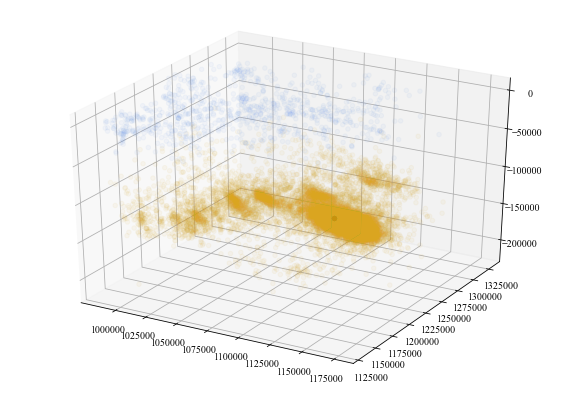

In [715]:
#Scatter plot 3D con el centroide

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(x1, y1, -1000*z1, color = "goldenrod", alpha=0.05)
ax.scatter3D(x2, y2, -1000*z2, color = "cornflowerblue", alpha=0.05)
ax.scatter3D(x_prom, y_prom, z_prom, color = "black", alpha=1)
ax.set_xlim3d(x1.min(), x1.max())
ax.set_ylim3d(y1.min(), y1.max())

plt.savefig('centroide_caso03.png', dpi=400)
plt.show()

In [716]:
corte = pd.read_csv('corte.csv')
corte

,FID,Y,X,PROF,Ml,POINT_X,POINT_Y,POINT_Z,POINT_M,SIZE
0,2377,6.835,-73.083,150.0,5.9,1110314.801,1247379.626,150.0,1,400
1,428,6.838,-73.044,157.9,5.6,1114625.726,1247720.531,157.9,1,400
2,18,6.832,-73.028,170.0,5.4,1116396.053,1247060.702,170.0,1,400
3,1163,6.839,-73.121,153.6,5.4,1106112.888,1247813.541,153.6,1,400
4,1428,6.834,-73.103,152.4,5.3,1108103.948,1247264.499,152.4,1,400
...,...,...,...,...,...,...,...,...,...,...
7283,6771,6.840,-72.975,138.3,1.0,1122253.581,1247958.678,138.3,1,2
7284,6893,6.828,-73.084,137.2,1.0,1110205.843,1246605.146,137.2,1,2
7285,4791,6.828,-73.283,145.1,0.9,1088205.858,1246564.347,145.1,1,2
7286,6139,6.826,-73.327,141.5,0.9,1083342.033,1246335.352,141.5,1,2


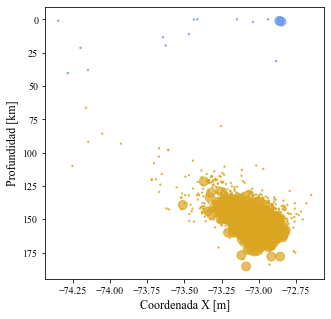

In [723]:
categories=corte['POINT_M'].to_numpy()
colormap = np.array(['g','goldenrod','cornflowerblue'])

plt.rcParams.update({'font.family':'Times New Roman'})
plt.figure(figsize=(5, 5))
plt.scatter(corte['X'], corte['PROF'], s=corte['SIZE'], c=colormap[categories], alpha=0.7)
plt.gca().invert_yaxis()
plt.xlabel('Coordenada X [m]', fontsize=12)
plt.ylabel('Profundidad [km]', fontsize=12)
plt.savefig('grafica.png', dpi=400) 
plt.show()

In [733]:
from datetime import datetime

start_date = datetime(2010,4,28,12,33)
end_date = datetime(2010,5,5,23,14)

from dateutil.relativedelta import relativedelta
difference_in_years = relativedelta(start_date, end_date).months

In [734]:
difference_in_years

0